In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

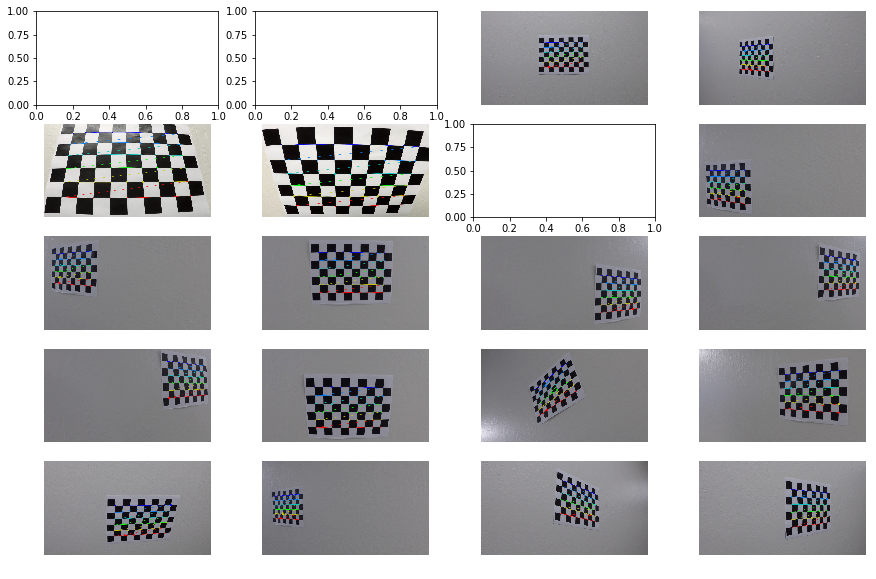

In [2]:
images = glob.glob('camera_cal/calibration*.jpg')

objpoints = []
imgpoints = []

objp = np.zeros((9*6, 3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)

fig, axs = plt.subplots(5,4, figsize=(15, 10))
fig.subplots_adjust(hspace = .2, wspace=.2)
axs = axs.ravel()

for i, image in enumerate(images):
    img = mpimg.imread(image)
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)

        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        axs[i].axis('off')
        axs[i].imshow(img)

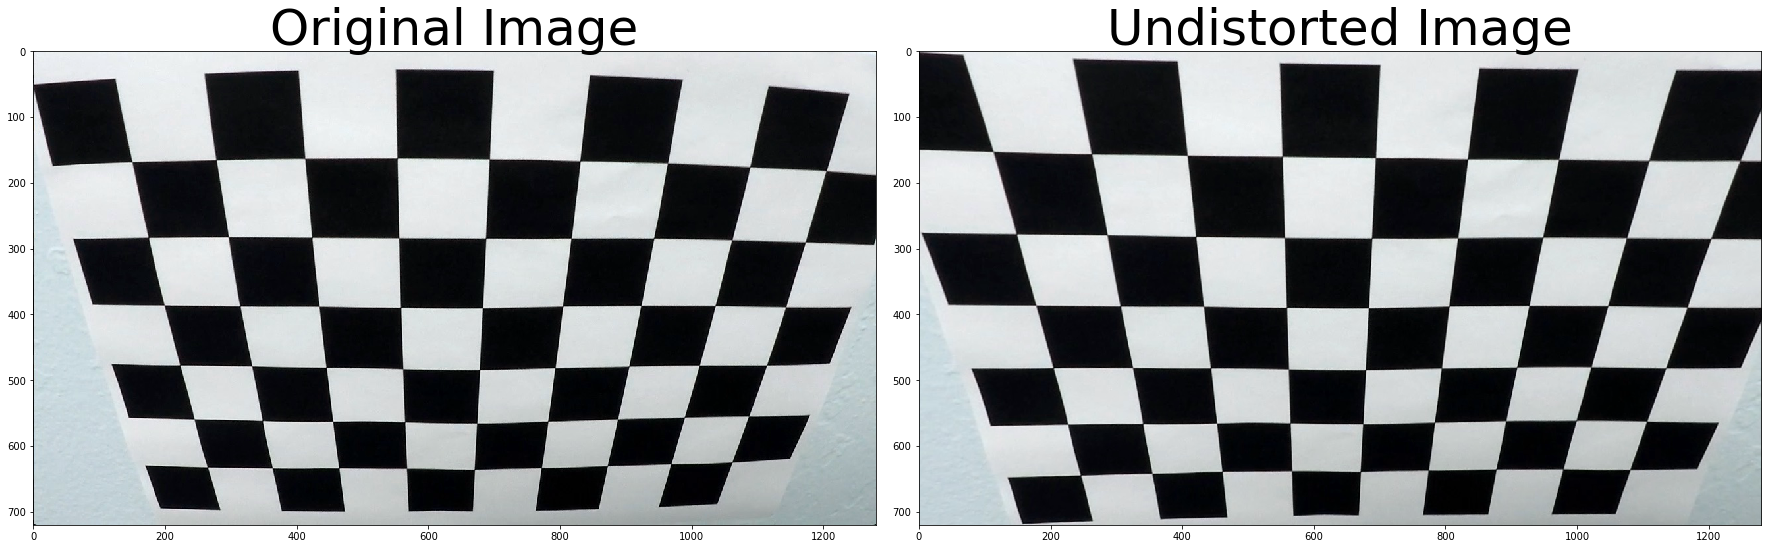

In [3]:
img = cv2.imread('./camera_cal/calibration2.jpg')
img_size = (img.shape[1], img.shape[0])

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)
undist = cv2.undistort(img, mtx, dist, None, mtx)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undist)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
#plt.savefig('a.jpg')

(720, 1280, 3)


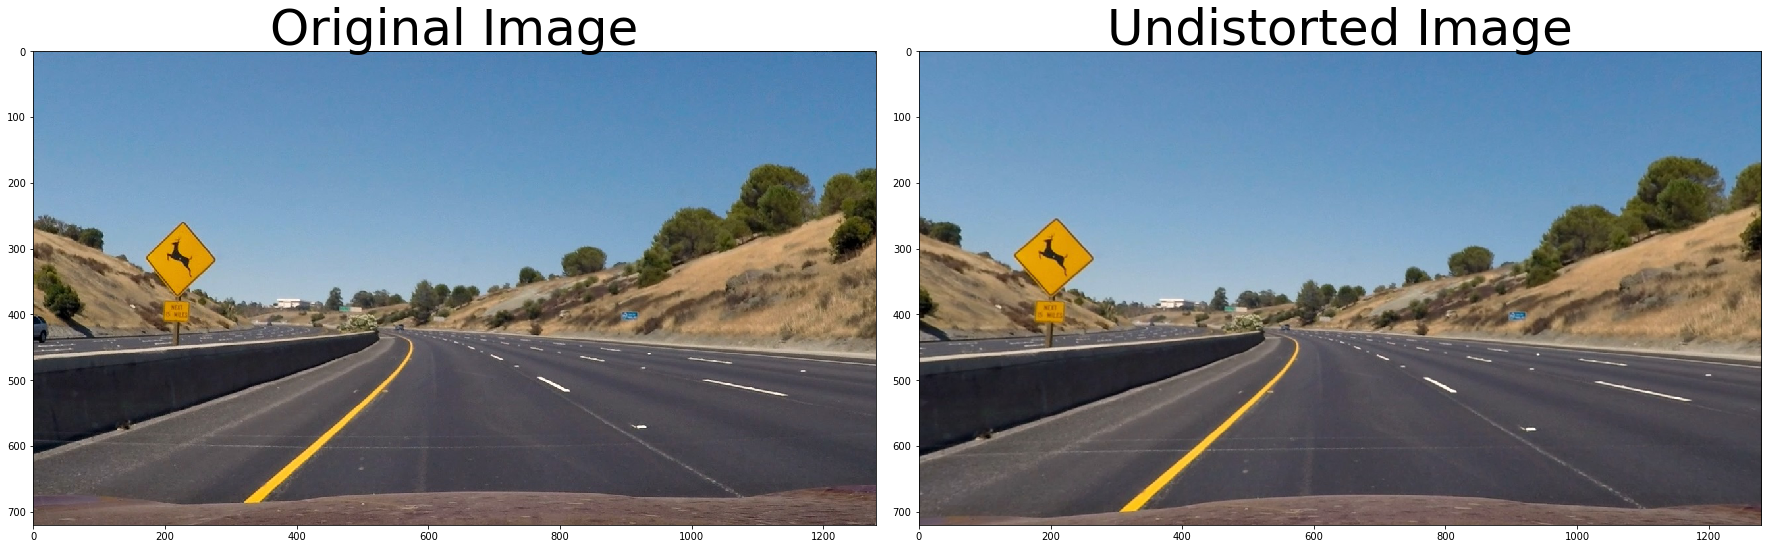

In [4]:
img = mpimg.imread('test_images/test2.jpg')

print (img.shape)
undist = cv2.undistort(img, mtx, dist, None, mtx)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undist)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [5]:
def warp(img):
    img_size = (img.shape[1], img.shape[0])
    height, width = img.shape[:2]
    src = np.float32([[600,480],[720,480],[280,660],[1030,660]])
    dst = np.float32([[450,0],[width-450,0],[450,height],[width-450,height]])

    M = cv2.getPerspectiveTransform(src, dst)
    
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    
    return warped

def unwarp(img):
    img_size = (img.shape[1], img.shape[0])
    height, width = img.shape[:2]
    src = np.float32([[600,480],[720,480],[280,660],[1030,660]])
    dst = np.float32([[450,0],[width-450,0],[450,height],[width-450,height]])

    Minv = cv2.getPerspectiveTransform(dst, src)
    
    unwarped = cv2.warpPerspective(img, Minv, img_size)
    
    return unwarped

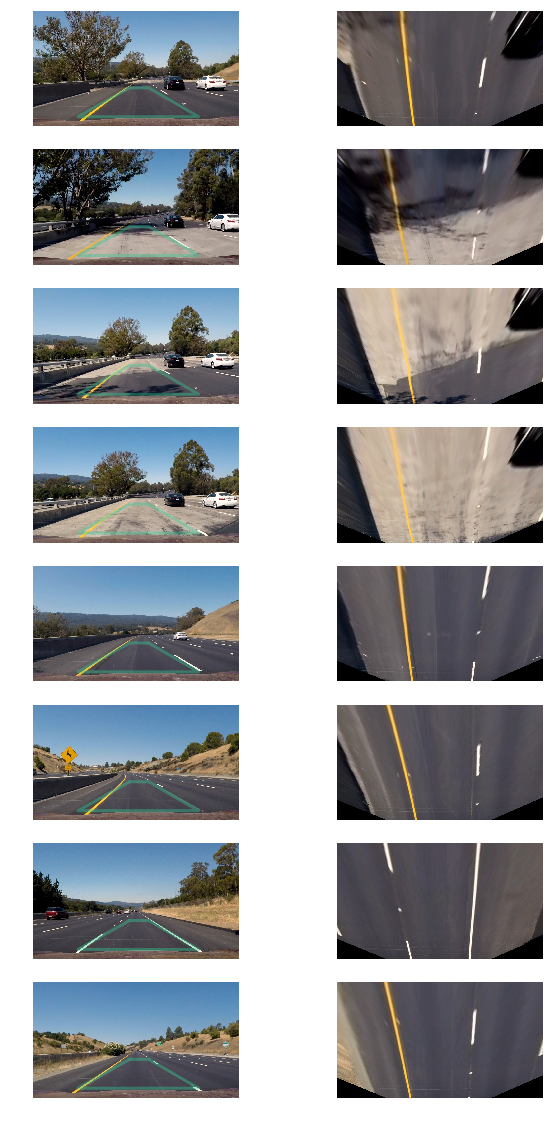

In [6]:
images = glob.glob('test_images/*.jpg')

fig, axs = plt.subplots(len(images),2, figsize=(10, 20))
fig.subplots_adjust(hspace = .2, wspace=.2)
axs = axs.ravel()
i = 0

src = np.float32([[600,480],[720,480],[280,660],[1030,660]])
x = [src[0][0],src[2][0],src[3][0],src[1][0],src[0][0]]
y = [src[0][1],src[2][1],src[3][1],src[1][1],src[0][1]]

for image in images:
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    warped = warp(img)
    axs[i].imshow(img)
    axs[i].axis('off')
    axs[i].plot(x, y, color='#33cc99', alpha=0.4, linewidth=3, solid_capstyle='round', zorder=2)
    i += 1
    axs[i].imshow(warped)
    axs[i].axis('off')
    i += 1

Text(0.5,1,'LAB B-Channel')

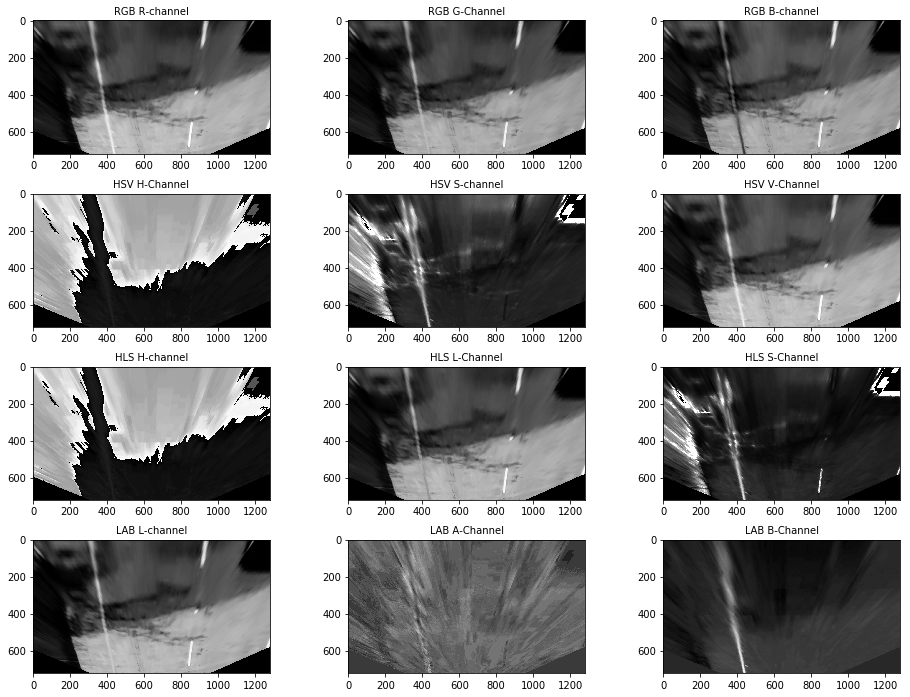

In [7]:
img = cv2.imread('test_images/test5.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

warped = warp(img)

warped_R = warped[:,:,0]
warped_G = warped[:,:,1]
warped_B = warped[:,:,2]

warped_HSV = cv2.cvtColor(warped, cv2.COLOR_RGB2HSV)
warped_H = warped_HSV[:,:,0]
warped_S = warped_HSV[:,:,1]
warped_V = warped_HSV[:,:,2]

warped_HLS = cv2.cvtColor(warped, cv2.COLOR_RGB2HLS)
warped_H1 = warped_HLS[:,:,0]
warped_L = warped_HLS[:,:,1]
warped_S1 = warped_HLS[:,:,2]

warped_LAB = cv2.cvtColor(warped, cv2.COLOR_RGB2LAB)
warped_L1 = warped_LAB[:,:,0]
warped_A = warped_LAB[:,:,1]
warped_B1 = warped_LAB[:,:,2]

fig, axs = plt.subplots(4,3, figsize=(16, 12))
fig.subplots_adjust(hspace = .3, wspace=.2)
axs = axs.ravel()

axs[0].imshow(warped_R, cmap='gray')
axs[0].set_title('RGB R-channel', fontsize=10)
axs[1].imshow(warped_G, cmap='gray')
axs[1].set_title('RGB G-Channel', fontsize=10)
axs[2].imshow(warped_B, cmap='gray')
axs[2].set_title('RGB B-channel', fontsize=10)
axs[3].imshow(warped_H, cmap='gray')
axs[3].set_title('HSV H-Channel', fontsize=10)
axs[4].imshow(warped_S, cmap='gray')
axs[4].set_title('HSV S-channel', fontsize=10)
axs[5].imshow(warped_V, cmap='gray')
axs[5].set_title('HSV V-Channel', fontsize=10)
axs[6].imshow(warped_H1, cmap='gray')
axs[6].set_title('HLS H-channel', fontsize=10)
axs[7].imshow(warped_L, cmap='gray')
axs[7].set_title('HLS L-Channel', fontsize=10)
axs[8].imshow(warped_S1, cmap='gray')
axs[8].set_title('HLS S-Channel', fontsize=10)
axs[9].imshow(warped_L1, cmap='gray')
axs[9].set_title('LAB L-channel', fontsize=10)
axs[10].imshow(warped_A, cmap='gray')
axs[10].set_title('LAB A-Channel', fontsize=10)
axs[11].imshow(warped_B1, cmap='gray')
axs[11].set_title('LAB B-Channel', fontsize=10)

Text(0.5,1,'Combined Gradient')

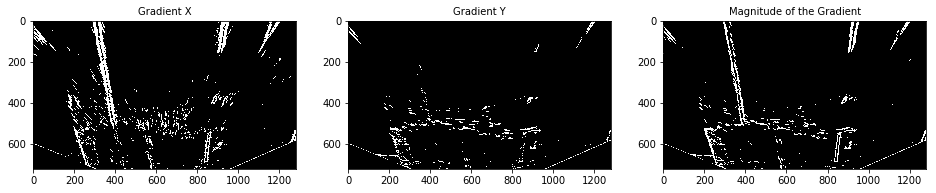

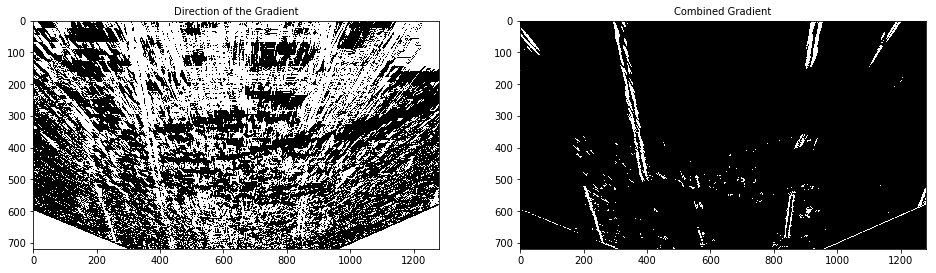

In [8]:
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Apply x or y gradient with the OpenCV Sobel() function
    # and take the absolute value
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1))
    # Rescale back to 8 bit integer
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # Create a copy and apply the threshold
    grad_binary = np.zeros_like(scaled_sobel)
    # Here I'm using inclusive (>=, <=) thresholds, but exclusive is ok too
    grad_binary[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    # Return the result
    return grad_binary

def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    # Calculate gradient magnitude
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Take both Sobel x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Calculate the gradient magnitude
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # Rescale to 8 bit
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    # Create a binary image of ones where threshold is met, zeros otherwise
    mag_binary = np.zeros_like(gradmag)
    mag_binary[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1

    return mag_binary

def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Calculate gradient direction
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Calculate the x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    dir_binary =  np.zeros_like(absgraddir)
    dir_binary[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1

    return dir_binary

# Choose a Sobel kernel size
ksize = 3 # Choose a larger odd number to smooth gradient measurements

# Apply each of the thresholding functions
gradx = abs_sobel_thresh(warped, orient='x', sobel_kernel=ksize, thresh=(10, 255))
grady = abs_sobel_thresh(warped, orient='y', sobel_kernel=ksize, thresh=(10, 255))
mag_binary = mag_thresh(warped, sobel_kernel=ksize, mag_thresh=(10, 255))
dir_binary = dir_threshold(warped, sobel_kernel=5, thresh=(0, 0.7))

combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1

fig1, axs1 = plt.subplots(1,3, figsize=(16, 12))
fig1.subplots_adjust(hspace = .2, wspace=.2)
axs1 = axs1.ravel()

fig2, axs2 = plt.subplots(1,2, figsize=(16, 12))
fig2.subplots_adjust(hspace = .2, wspace=.2)
axs2 = axs2.ravel()

axs1[0].imshow(gradx, cmap='gray')
axs1[0].set_title('Gradient X', fontsize=10)
axs1[1].imshow(grady, cmap='gray')
axs1[1].set_title('Gradient Y', fontsize=10)
axs1[2].imshow(mag_binary, cmap='gray')
axs1[2].set_title('Magnitude of the Gradient', fontsize=10)
axs2[0].imshow(dir_binary, cmap='gray')
axs2[0].set_title('Direction of the Gradient', fontsize=10)
axs2[1].imshow(combined, cmap='gray')
axs2[1].set_title('Combined Gradient', fontsize=10)

In [9]:
def binary(img, thresh=(230,255)):
    if (np.max(img) > 170):
        img = img*(255/np.max(img))
    
    binary_output = np.zeros_like(img)
    binary_output[((img >= thresh[0]) & (img <= thresh[1]))] = 1
    
    return binary_output

def lines(img):
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    warped = warp(undist)

    warped_HSV = cv2.cvtColor(warped, cv2.COLOR_RGB2HSV)
    warped_LAB = cv2.cvtColor(warped, cv2.COLOR_RGB2LAB)

    warped_R = warped[:,:,0]
    warped_R = binary(warped_R)
    
    warped_B = warped_LAB[:,:,2]
    warped_B = binary(warped_B, thresh=(210,255))

    combined = np.zeros_like(warped_R)
    combined[(warped_R == 1) | (warped_B == 1)] = 1
    
    return combined

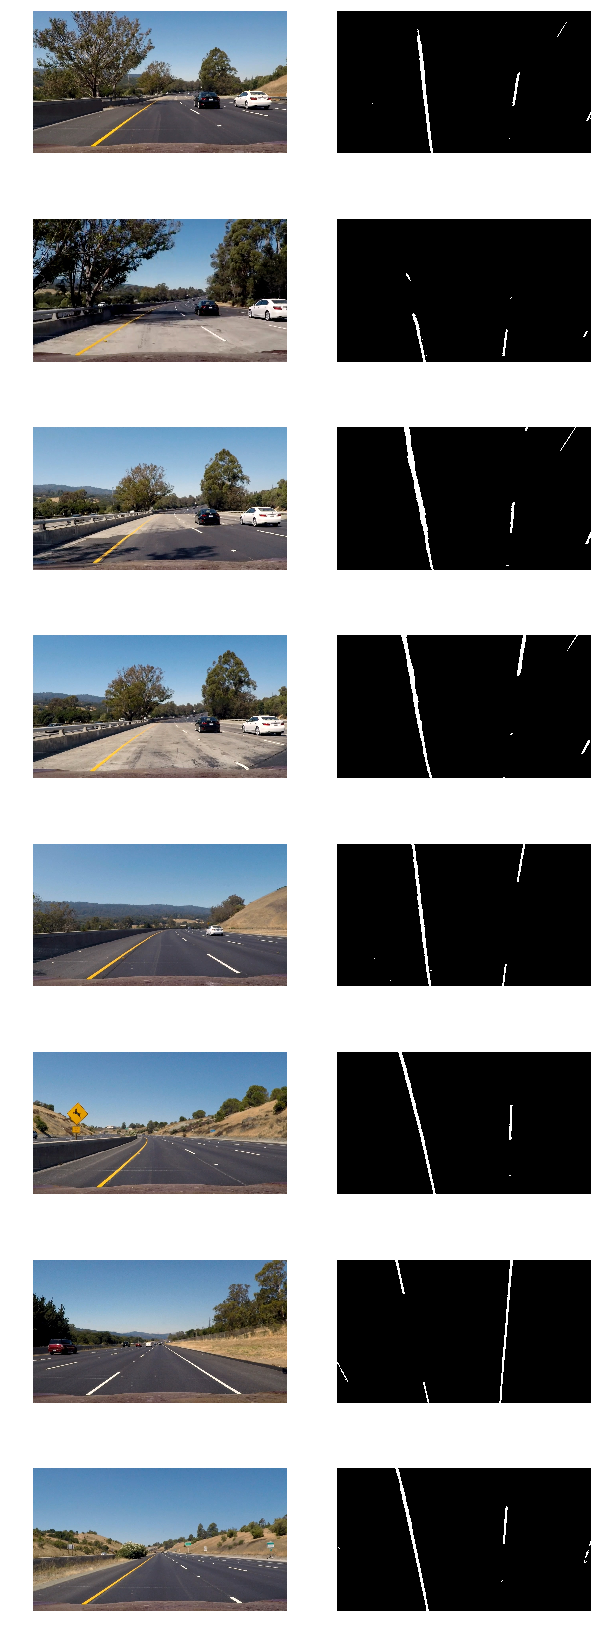

In [10]:
images = glob.glob('test_images/*.jpg')

fig, axs = plt.subplots(len(images),2, figsize=(10, 30))
fig.subplots_adjust(hspace = .2, wspace=.2)
axs = axs.ravel()
i = 0

for image in images:
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    binary_out = lines(img)
    axs[i].imshow(img)
    axs[i].axis('off')
    i += 1
    axs[i].imshow(binary_out, cmap='gray')
    axs[i].axis('off')
    i += 1

In [11]:
def sliding_windows(binary_warped):
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and  visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    left_offset = np.int(histogram.shape[0] * 0.08)
    right_offset = np.int(histogram.shape[0] * 0.92)
    
    leftx_base = np.argmax(histogram[left_offset:midpoint]) + left_offset
    rightx_base = np.argmax(histogram[midpoint:right_offset]) + midpoint

    # Choose the number of sliding windows
    nwindows = 9
    # Set height of windows
    window_height = np.int(binary_warped.shape[0]//nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),
        (0,255,0), 3) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),
        (0,255,0), 3) 
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    
    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
    
    return out_img, histogram, left_fit, right_fit, left_fitx, right_fitx

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(720, 0)

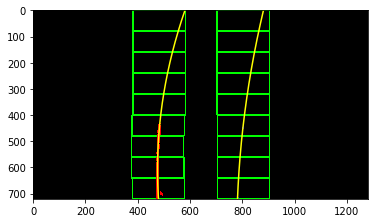

In [24]:
img = mpimg.imread('test_images/3.jpg')

binary_warped = lines(img)

ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
out_img, histogram, left_fit, right_fit, left_fitx, right_fitx = sliding_windows(binary_warped)

plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

(0, 1280)

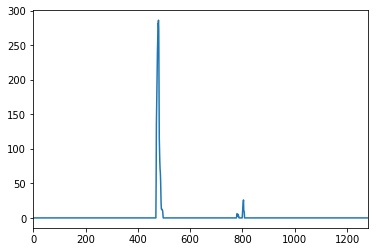

In [25]:
plt.plot(histogram)
plt.xlim(0,1280)

In [26]:
def region(binary_warped, left_fit, right_fit):
    # Assume you now have a new warped binary image 
    # from the next frame of video (also called "binary_warped")
    # It's now much easier to find line pixels!
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    margin = 100
    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + 
    left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + 
    left_fit[1]*nonzeroy + left_fit[2] + margin))) 

    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + 
    right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + 
    right_fit[1]*nonzeroy + right_fit[2] + margin)))  

    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    window_img = np.zeros_like(out_img)
    # Color in left and right line pixels
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
                                  ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
                                  ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
    result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
    
    return result, left_fitx, right_fitx, left_lane_inds, right_lane_inds, left_fit, right_fit

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(720, 0)

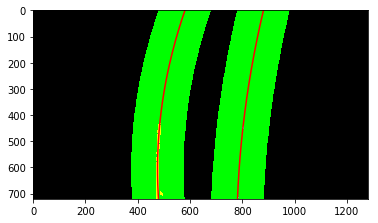

In [27]:
result, left_fitx, right_fitx, left_lane_inds, right_lane_inds, left_fit, right_fit = region(binary_warped, left_fit, right_fit)

plt.imshow(result)
plt.plot(left_fitx, ploty, color='red')
plt.plot(right_fitx, ploty, color='red')
plt.xlim(0, 1280)
plt.ylim(720, 0)

In [28]:
def measure_curvature(binary_warped, left_lane_inds, right_lane_inds, left_fit, right_fit):
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension

    h,w = binary_warped.shape
    ploty = np.linspace(0, h-1, h)
    y_eval = np.max(ploty)
    # Fit new polynomials to x,y in world space
    left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
    
    # Calculate the new radii of curvature
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    # Now our radius of curvature is in meters
    left_fit_bottom = left_fit[0]*h**2 + left_fit[1]*h + left_fit[2]
    right_fit_bottom = right_fit[0]*h**2 + right_fit[1]*h + right_fit[2]
    car_pos = w/2
    center = (car_pos - (left_fit_bottom + right_fit_bottom) / 2) * xm_per_pix
    
    return left_curverad, right_curverad, center

In [29]:
left_curverad, right_curverad, center = measure_curvature(binary_warped, left_lane_inds, right_lane_inds, left_fit, right_fit)

print('Radius of left curve:', left_curverad, 'm')
print('Radius of right curve:', right_curverad, 'm')
print('The position of vehicle:', center, 'm')

Radius of left curve: 578.138541956 m
Radius of right curve: 1199.9480261 m
The position of vehicle: 0.0502552509988 m


In [30]:
def draw(img, left_fitx, right_fitx, left_curverad, right_curverad, center):
    new_warped = np.zeros_like(img).astype(np.uint8)
    
    left_points = np.array([np.transpose(np.vstack((left_fitx, ploty)))], np.int32)
    right_points = np.array([np.flipud(np.transpose(np.vstack((right_fitx, ploty))))], np.int32)
    points = np.hstack((left_points, right_points))
    
    cv2.fillPoly(new_warped, points, (0,255,0))
    cv2.polylines(new_warped, left_points, isClosed=False, color=(255,0,0), thickness=20)
    cv2.polylines(new_warped, right_points, isClosed=False, color=(0,0,255), thickness=20)
    
    new_unwarped = unwarp(new_warped)
    combined = cv2.addWeighted(img, 1, new_unwarped, 1, 0)
    
    font = cv2.FONT_HERSHEY_DUPLEX
    text = 'Left curve radius: ' + '{:04.2f}'.format(left_curverad) + 'm'
    cv2.putText(combined, text, (40,50), font, 1.5, (255,0,0), 2, cv2.LINE_AA)
    text = 'Right curve radius: ' + '{:04.2f}'.format(right_curverad) + 'm'
    cv2.putText(combined, text, (40,100), font, 1.5, (255,0,0), 2, cv2.LINE_AA)
    text = 'The position of vehicle:' + '{:04.3f}'.format(center) + 'm '
    cv2.putText(combined, text, (40,150), font, 1.5, (255,0,0), 2, cv2.LINE_AA)
    
    return combined

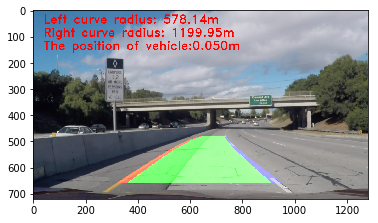

In [31]:
combined = draw(img, left_fitx, right_fitx, left_curverad, right_curverad, center)
plt.imshow(combined) 